In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [33]:
import logging
import string
import sys

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dask.distributed import Client
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from replay_trajectory_classification import SortedSpikesClassifier
from replay_trajectory_classification.state_transition import \
    estimate_movement_var

from src.figure_utilities import (PAGE_HEIGHT, TWO_COLUMN, save_figure,
                                  set_figure_defaults)
from src.parameters import STATE_COLORS, TRANSITION_TO_CATEGORY

set_figure_defaults()

In [11]:
from replay_trajectory_classification import SortedSpikesClassifier
from replay_trajectory_classification.state_transition import \
    estimate_movement_var
from src.sorted_spikes_simulation import (make_continuous_replay,
                                          make_fragmented_continuous_fragmented_replay,
                                          make_fragmented_hover_fragmented_replay,
                                          make_fragmented_replay,
                                          make_hover_continuous_hover_replay,
                                          make_hover_replay,
                                          make_simulated_run_data)

client = Client(processes=False)

(time, linear_distance, sampling_frequency,
 spikes, place_fields) = make_simulated_run_data()

movement_var = estimate_movement_var(linear_distance, sampling_frequency)

classifier = SortedSpikesClassifier(movement_var=movement_var,
                                    replay_speed=120,
                                    spike_model_penalty=0.5,
                                    place_bin_size=np.sqrt(movement_var))
classifier.fit(linear_distance, spikes)

SortedSpikesClassifier(continuous_transition_types=[['random_walk', 'uniform', 'identity'], ['uniform', 'uniform', 'uniform'], ['random_walk', 'uniform', 'identity']],
            discrete_transition_diag=0.999,
            discrete_transition_type='strong_diagonal',
            infer_track_interior=True,
            initial_conditions_type='uniform_on_track', knot_spacing=10,
            movement_var=0.2775841643294233,
            place_bin_size=0.526862566832588, position_range=None,
            replay_speed=120, spike_model_penalty=0.5)

In [12]:
replay_time, test_spikes = make_continuous_replay()
results = classifier.predict(test_spikes, time=replay_time)

Text(-0.25, 1.0, 'b')

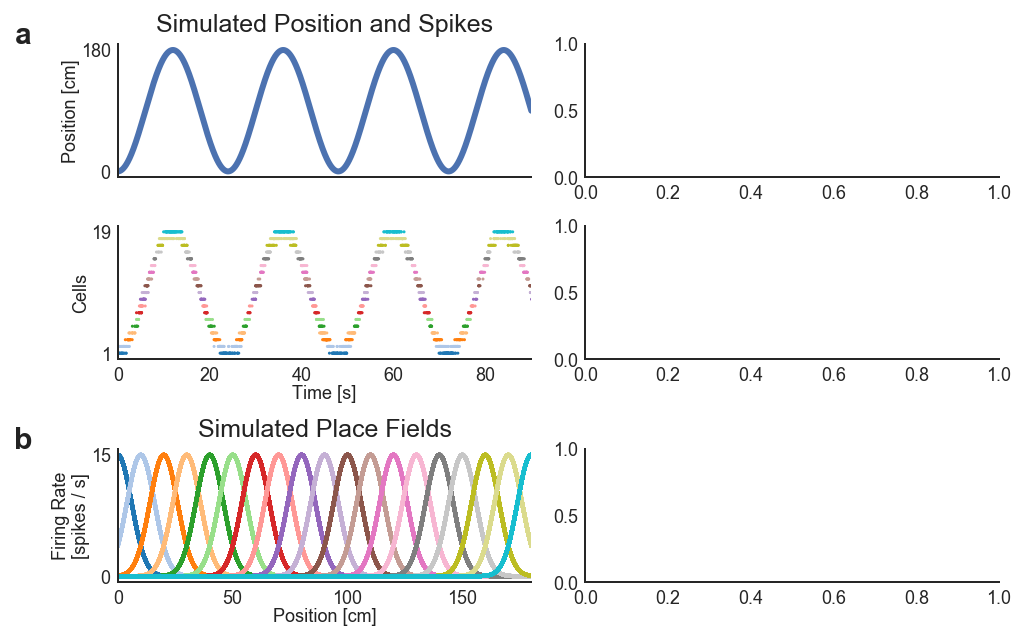

In [49]:
from src.sorted_spikes_simulation import make_simulated_run_data
from src.figure_utilities import TWO_COLUMN, GOLDEN_RATIO

spike_ind, neuron_ind = np.nonzero(spikes)
cmap = plt.get_cmap('tab20')

fig, axes = plt.subplots(3, 2, figsize=(TWO_COLUMN, TWO_COLUMN * GOLDEN_RATIO),
                         constrained_layout=True)

axes[0, 0].plot(time, linear_distance, linewidth=3)
axes[0, 0].set_ylabel('Position [cm]')
axes[0, 0].set_title('Simulated Position and Spikes')
axes[0, 0].set_yticks([0, np.round(linear_distance.max())])
axes[0, 0].set_xticks([])
axes[0, 0].set_xlim((0.0, 90.0))
axes[0, 0].text(-0.25, 1.0, 'a', transform=axes[0, 0].transAxes, 
        size=15, weight='extra bold')

c = [cmap.colors[ind] for ind in neuron_ind]
axes[1, 0].scatter(time[spike_ind], neuron_ind + 1, c=c, s=0.5)
axes[1, 0].set_yticks((1, spikes.shape[1]))
axes[1, 0].set_ylabel('Cells')

axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_xlim((0.0, 90.0))

sns.despine()

for place_field, color in zip(place_fields.T, cmap.colors):
    axes[2, 0].plot(linear_distance, place_field, linewidth=2, color=color)
axes[2, 0].set_xlabel('Position [cm]')
axes[2, 0].set_ylabel('Firing Rate\n[spikes / s]')
axes[2, 0].set_title('Simulated Place Fields')
axes[2, 0].set_xlim((linear_distance.min(), linear_distance.max()))
axes[2, 0].set_yticks([0, np.round(place_fields.max())])
axes[2, 0].text(-0.25, 1.0, 'b', transform=axes[2, 0].transAxes, 
        size=15, weight='extra bold')

